<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/M%C3%A9todo_Expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Explícito

Usamos diferencias finitas, definidas como:
$$
U_{i,j+1}=(1-2\frac{\alpha^2k}{h^2})U_{ij}+\alpha^2\frac{k}{h^2}(U_{i-1,j}+U_{i+1,j})
$$

Condición de Estabilidad:
$$
r = \frac{k}{h ^ 2 } \leq 0.5
$$
Generalización si $\alpha \neq 1$
$$
r = \frac{\alpha k}{h ^ 2 } \leq \frac{1}{2}
$$

🔹 Caso 1: Inestable, r = 1.000
✅ Caso 2: Estable, nuevo k = 0.00500, r = 0.500


/tmp/ipython-input-3356810369.py:80: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3356810369.py:80: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


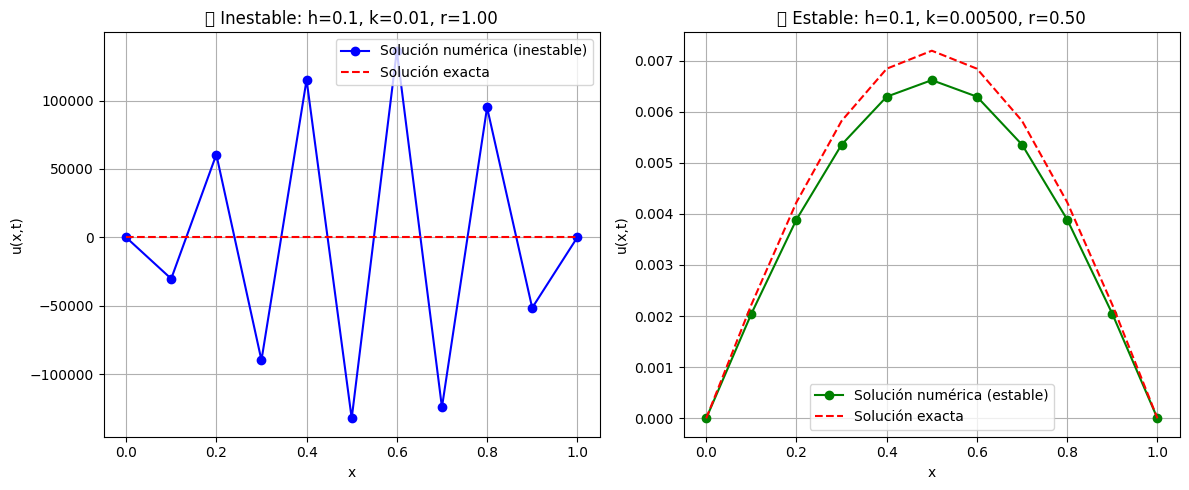

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


h = 0.1
k = 0.01
T = 0.5
L = 1.0

x = np.arange(0, L + h, h)
nx = len(x)
t = np.arange(0, T + k, k)
nt = len(t)

#Número de Fourier
r = k / h**2
print(f"🔹 Caso 1: Inestable, r = {r:.3f}")


# CASO 1: INESTABLE

u1 = np.zeros((nt, nx))
u1[0, :] = np.sin(np.pi * x)
u1[:, 0] = 0
u1[:, -1] = 0

for n in range(0, nt - 1):
    for i in range(1, nx - 1):
        u1[n + 1, i] = r * (u1[n, i + 1] - 2*u1[n, i] + u1[n, i - 1]) + u1[n, i]

#Solución exacta
u_exact = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)


# CASO 2: ESTABLE (corrigiendo k)

k2 = 0.5 * h**2  # valor máximo estable
r2 = k2 / h**2
print(f"✅ Caso 2: Estable, nuevo k = {k2:.5f}, r = {r2:.3f}")

t2 = np.arange(0, T + k2, k2)
nt2 = len(t2)

u2 = np.zeros((nt2, nx))
u2[0, :] = np.sin(np.pi * x)
u2[:, 0] = 0
u2[:, -1] = 0

for n in range(0, nt2 - 1):
    for i in range(1, nx - 1):
        u2[n + 1, i] = r2 * (u2[n, i + 1] - 2*u2[n, i] + u2[n, i - 1]) + u2[n, i]

# -----------------------------
# GRÁFICAS COMPARATIVAS
# -----------------------------
plt.figure(figsize=(12,5))

# Gráfica 1: Solución inestable
plt.subplot(1,2,1)
plt.plot(x, u1[-1, :], 'o-', color='blue', label='Solución numérica (inestable)')
plt.plot(x, u_exact, 'r--', label='Solución exacta')
plt.title(f" Inestable: h={h}, k={k}, r={r:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)

# Gráfica 2: Solución estable
plt.subplot(1,2,2)
plt.plot(x, u2[-1, :], 'o-', color='green', label='Solución numérica (estable)')
plt.plot(x, u_exact, 'r--', label='Solución exacta')
plt.title(f" Estable: h={h}, k={k2:.5f}, r={r2:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()